In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', '{:.2f}'.format)

### 1. Load Data

In [36]:
df = pd.read_excel('../data/sample_data__technical_assessment_1.xlsx')
df.head(20)

,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr
0,2023-11-01,185196607,PA,2023-11-21,2023-11-21,NaT,BCUSA22L,7102592,BETTING,10.00,210.00,13.18
1,2023-11-01,154497623,AZ,2022-10-28,2022-10-28,2022-10-28,actionnetwork,7039239,BETTING,0.00,5.00,4.00
2,2023-11-01,153249011,MI,2022-08-18,2023-12-21,NaT,starsportsmx,7049874,CASINO,0.00,0.00,0.00
3,2023-11-01,184718245,OH,2023-11-13,2023-11-13,2023-11-13,actionnetwork,7106987,BETTING,10.00,210.00,138.98
4,2023-11-01,183573211,OH,2023-11-06,2023-11-06,2023-11-06,BCUSA22NP,7106983,BETTING,10.00,210.00,-320.22
5,2023-11-01,153923970,PA,2022-09-12,2022-09-12,2022-09-12,BCUSA22N,7086406,CASINO,0.00,0.00,0.00
6,2023-11-01,174413334,TN,2023-10-05,2023-10-05,2023-11-21,BCUSA22N,7086400,BETTING,60.00,303.00,68.46
7,2023-11-01,153776081,AZ,2022-09-10,2022-09-10,2022-09-15,starsportsmx,7080479,BETTING,0.00,170.00,136.00
8,2023-11-01,160312091,OH,2022-12-03,2023-05-20,2023-01-08,actionnetwork,7083318,BETTING,0.00,1188.58,261.74
9,2023-11-01,184803642,MD,2023-11-14,NaT,NaT,actionnetwork,7106987,BETTING,0.00,0.00,0.00


### 2. Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity_month      52500 non-null  datetime64[ns]
 1   account_id          52500 non-null  int64         
 2   brand_id            52500 non-null  object        
 3   reg_date            52500 non-null  datetime64[ns]
 4   ftd_date            45238 non-null  datetime64[ns]
 5   qp_date             31263 non-null  datetime64[ns]
 6   ben_login_id        52500 non-null  object        
 7   tracker_id          52500 non-null  int64         
 8   player_reg_product  52500 non-null  object        
 9   total_deposit       52500 non-null  float64       
 10  total_handle        52338 non-null  float64       
 11  total_ngr           52500 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(2), object(3)
memory usage: 4.8+ MB


In [4]:
# Changing account_id and tracker_id to string so describe() doesn't treat them as numbers
df['account_id'] = df['account_id'].astype(str)
df['tracker_id'] = df['tracker_id'].astype(str)
df.describe(include='all')

,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr
count,52500,52500,52500,52500,45238,31263,52500,52500,52500,52500.00,52338.00,52500.00
unique,NaN,45915,29,NaN,NaN,NaN,7,960,5,NaN,NaN,NaN
top,NaN,154819309,OH,NaN,NaN,NaN,actionnetwork,7080479,BETTING,NaN,NaN,NaN
freq,NaN,7,6467,NaN,NaN,NaN,18747,4139,44859,NaN,NaN,NaN
mean,2023-07-01 21:42:51.428571648,NaN,NaN,2023-02-24 08:09:09.668571904,2023-03-09 13:02:57.779742464,2023-03-18 16:15:45.168409856,NaN,NaN,NaN,262.38,1552.66,36.72
min,2022-09-01 00:00:00,NaN,NaN,2022-01-04 00:00:00,2020-03-08 00:00:00,2022-01-09 00:00:00,NaN,NaN,NaN,0.00,0.00,-116450.00
25%,2023-02-01 00:00:00,NaN,NaN,2022-10-20 00:00:00,2022-11-04 00:00:00,2022-11-09 00:00:00,NaN,NaN,NaN,0.00,0.00,-0.08
50%,2023-07-01 00:00:00,NaN,NaN,2023-01-05 00:00:00,2023-01-22 00:00:00,2023-01-28 00:00:00,NaN,NaN,NaN,0.00,30.00,0.00
75%,2023-12-01 00:00:00,NaN,NaN,2023-06-16 00:00:00,2023-07-01 00:00:00,2023-07-03 00:00:00,NaN,NaN,NaN,40.00,220.00,29.78
max,2024-05-01 00:00:00,NaN,NaN,2024-05-31 00:00:00,2024-06-06 00:00:00,2024-06-09 00:00:00,NaN,NaN,NaN,437952.00,4769780.00,59168.40


### 3. Handling missing values

In [5]:
df.isnull().sum()

activity_month            0
account_id                0
brand_id                  0
reg_date                  0
ftd_date               7262
qp_date               21237
ben_login_id              0
tracker_id                0
player_reg_product        0
total_deposit             0
total_handle            162
total_ngr                 0
dtype: int64

In [6]:
100 - df.isnull().sum() / len(df) * 100

activity_month       100.00
account_id           100.00
brand_id             100.00
reg_date             100.00
ftd_date              86.17
qp_date               59.55
ben_login_id         100.00
tracker_id           100.00
player_reg_product   100.00
total_deposit        100.00
total_handle          99.69
total_ngr            100.00
dtype: float64

So about 40% of the provided data is missing qp_date, which is one of the most important features for the models we want to build. I'm going to explore this further

In [7]:
df.sort_values(by=['account_id', 'qp_date']).head(20)

,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr
13751,2023-02-01,150721197,NY,2022-03-01,2022-03-01,NaT,actionnetwork,7039239,BETTING,0.00,100.00,49.00
40026,2024-02-01,150723276,AZ,2022-03-01,2022-03-05,NaT,actionnetwork,7102578,BETTING,0.00,8.03,6.42
1267,2023-01-01,150724803,MI,2022-03-01,2022-11-04,2022-11-04,starsportsmx,7050618,CASINO,0.00,0.00,0.00
3710,2022-09-01,150724928,PA,2022-03-01,NaT,NaT,BCUSA22L,7075150,BETTING,0.00,55.00,55.00
8515,2022-10-01,150726525,NY,2022-03-02,2022-03-02,NaT,BCUSA22NP,7072277,BETTING,0.00,100.00,-51.00
16517,2023-04-01,150726626,NO,2022-02-03,NaT,NaT,starsportsmx,7051418,BINGO,0.00,0.00,0.00
49442,2023-10-01,150727790,GM,2022-03-02,2022-03-02,NaT,BCUSA22NP,7102587,BETTING,0.00,80.00,-100.10
28336,2023-12-01,150728131,NO,2022-03-02,2022-03-02,NaT,BCUSA22L,7051384,CASINO,0.00,0.00,10.00
15811,2023-04-01,150730271,AZ,2022-02-03,2022-03-02,NaT,BCUSA22NP,7072277,BETTING,0.00,229.88,112.11
47192,2024-05-01,150731120,PA,2022-03-03,2022-03-03,NaT,BCUSA22NP,7050457,BETTING,0.00,2.50,-1.03


There are players with no qp_date/ftd_date, yet they have deposits/handles/ngr. This suggests something is missing: is this a business logic, where some players were given credits/freebies to place bets without having to deposit? Or is it a problem with the data?

Without more information, I have to make some assumptions. For now, I'll exclude these records

In [8]:
df_clean = df.dropna(subset=['ftd_date','qp_date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31259 entries, 1 to 52499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity_month      31259 non-null  datetime64[ns]
 1   account_id          31259 non-null  object        
 2   brand_id            31259 non-null  object        
 3   reg_date            31259 non-null  datetime64[ns]
 4   ftd_date            31259 non-null  datetime64[ns]
 5   qp_date             31259 non-null  datetime64[ns]
 6   ben_login_id        31259 non-null  object        
 7   tracker_id          31259 non-null  object        
 8   player_reg_product  31259 non-null  object        
 9   total_deposit       31259 non-null  float64       
 10  total_handle        31259 non-null  float64       
 11  total_ngr           31259 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 3.1+ MB


In [9]:
print(f'Dropped records: {(100 - (len(df_clean) / len(df)) * 100):.2f}%')
print(f'Dropped accounts: {(100 - (df_clean.account_id.nunique() / df.account_id.nunique()) * 100):.2f}%')

Dropped records: 40.46%
Dropped accounts: 42.85%


We dropped ~40% of the records and accounts. Ouch!

In [10]:
df_clean.sort_values(by=['account_id', 'qp_date']).head(20)

,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr
1267,2023-01-01,150724803,MI,2022-03-01,2022-11-04,2022-11-04,starsportsmx,7050618,CASINO,0.00,0.00,0.00
47767,2024-05-01,150736656,NY,2022-03-03,2023-01-07,2023-01-07,actionnetwork,7074015,BETTING,595.00,1122.42,-113.73
32575,2023-07-01,150743829,IS,2022-03-05,2022-12-03,2022-12-03,actionnetwork,7034205,BETTING,0.00,2.00,0.00
32293,2022-12-01,150745090,IS,2022-03-05,2022-04-08,2022-09-10,actionnetwork,7074086,BETTING,0.00,967.48,-1.49
40171,2024-02-01,150745090,IS,2022-03-05,2022-04-08,2022-09-10,actionnetwork,7074086,BETTING,0.00,0.00,0.00
23272,2023-07-01,150745813,IS,2022-03-05,2022-11-14,2022-11-14,actionnetwork,7074015,BETTING,50.00,54.00,0.00
41204,2023-09-01,150746842,IS,2022-03-05,2023-03-18,2023-03-18,actionnetwork,7074015,BETTING,65.00,153.15,76.15
6343,2022-09-01,150746950,IS,2022-03-05,2022-09-25,2022-09-25,actionnetwork,7074015,BETTING,25.00,1.00,0.45
7752,2022-09-01,150751451,PA,2022-03-05,2022-03-05,2022-10-01,BCUSA22L,7037834,CASINO,200.00,0.00,-4.40
36525,2023-06-01,150751870,CO,2022-05-03,2022-02-10,2022-10-02,BCUSA22NP,7037832,BETTING,0.00,20.00,18.00


This is a dataset we can work with

### 4. Handling duplicated values

In [11]:
df_clean.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 31259 entries, 1 to 52499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity_month      31259 non-null  datetime64[ns]
 1   account_id          31259 non-null  object        
 2   brand_id            31259 non-null  object        
 3   reg_date            31259 non-null  datetime64[ns]
 4   ftd_date            31259 non-null  datetime64[ns]
 5   qp_date             31259 non-null  datetime64[ns]
 6   ben_login_id        31259 non-null  object        
 7   tracker_id          31259 non-null  object        
 8   player_reg_product  31259 non-null  object        
 9   total_deposit       31259 non-null  float64       
 10  total_handle        31259 non-null  float64       
 11  total_ngr           31259 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 3.1+ MB


No dupes. Moving on

### 5. Analyzing categorical columns
#### a. Brand ID

In [37]:
df_clean.brand_id.nunique()

28

Moderate cardinality, can label encode

In [38]:
df_clean.brand_id.unique()

array(['AZ', 'OH', 'PA', 'TN', 'MI', 'CO', 'IS', 'MD', 'NO', 'VA', 'GM',
       'KY', 'IA', 'KS', 'NY', 'IN', 'WY', 'ER', 'CA', 'MA', 'NE', 'DC',
       'WV', 'LA', 'MS', 'NJ', 'NV', 'NC'], dtype=object)

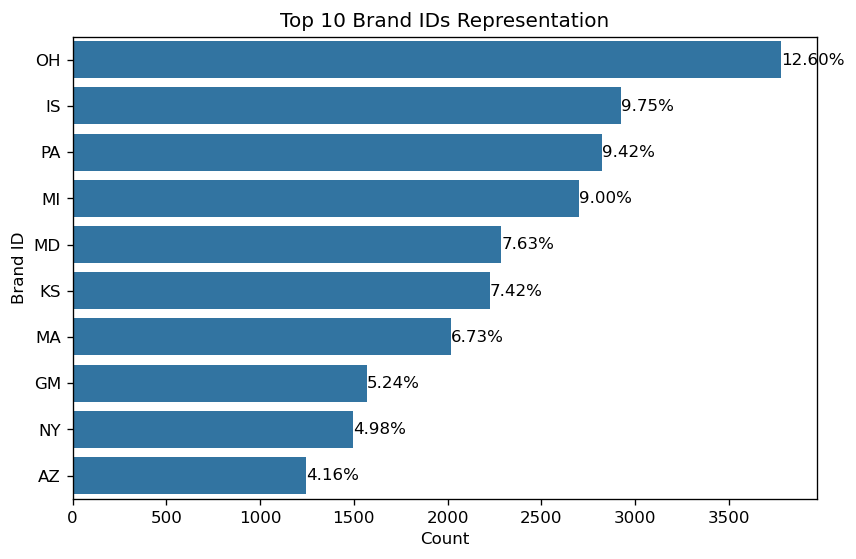

In [46]:
p1 = df_clean['brand_id'].value_counts(dropna=False).sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5), dpi=120)
splot = sns.barplot(y=p1.index, x=p1.values)
for p, label in zip(splot.patches, p1):
    splot.annotate(f'{(label/len(df_clean))*100:.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Brand ID')
plt.xlabel('Count')
plt.title('Top 10 Brand IDs Representation')
plt.show()

#### b. Ben Login ID

In [47]:
df_clean.ben_login_id.nunique()

7

Low cardinality, can label encode

In [48]:
df_clean.ben_login_id.unique()

array(['actionnetwork', 'BCUSA22NP', 'BCUSA22N', 'starsportsmx',
       'BCUSA22L', 'BCCSB22', 'wedgetraffic'], dtype=object)

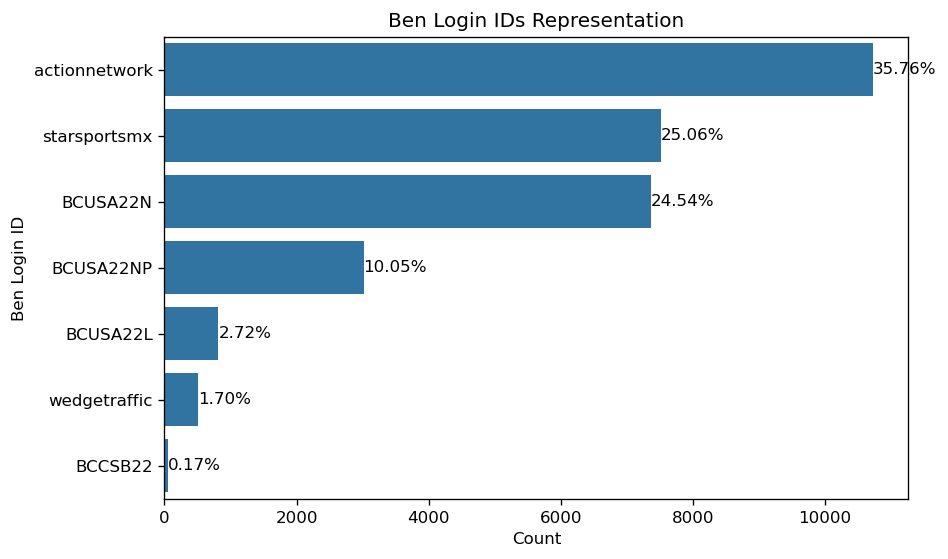

In [49]:
p1 = df_clean['ben_login_id'].value_counts(dropna=False).sort_values(ascending=False)
plt.figure(figsize=(8, 5), dpi=120)
splot = sns.barplot(y=p1.index, x=p1.values)
for p, label in zip(splot.patches, p1):
    splot.annotate(f'{(label/len(df_clean))*100:.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Ben Login ID')
plt.xlabel('Count')
plt.title('Ben Login IDs Representation')
plt.show()

#### c. Tracker ID

In [50]:
df_clean.tracker_id.nunique()

755

Huge cardinality, can't label encode. Maybe target encode?

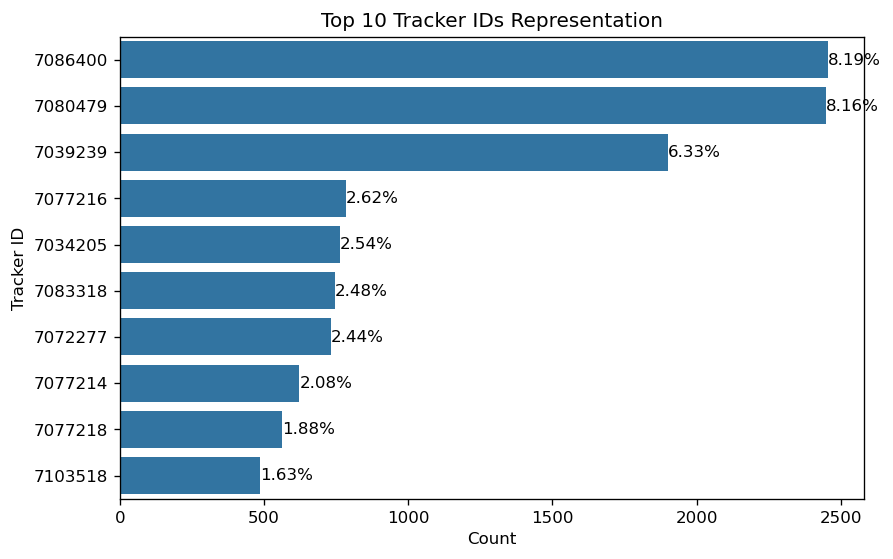

In [51]:
p1 = df_clean['tracker_id'].value_counts(dropna=False).sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5), dpi=120)
splot = sns.barplot(y=p1.index, x=p1.values)
for p, label in zip(splot.patches, p1):
    splot.annotate(f'{(label/len(df_clean))*100:.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Tracker ID')
plt.xlabel('Count')
plt.title('Top 10 Tracker IDs Representation')
plt.show()

#### d. Player Reg Product

In [52]:
df_clean.player_reg_product.nunique()

3

Low cardinality, label encode

In [53]:
df_clean.player_reg_product.unique()

array(['BETTING', 'CASINO', 'POKER'], dtype=object)

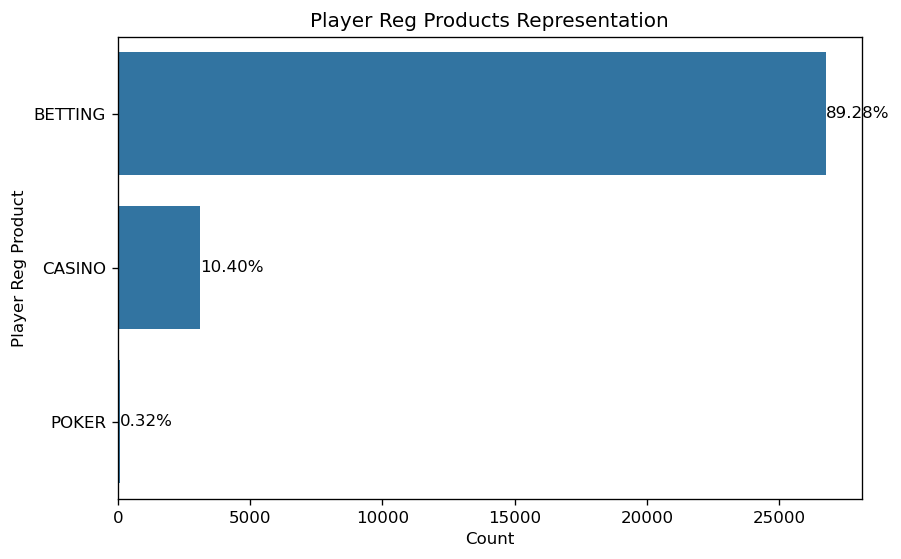

In [54]:
p1 = df_clean['player_reg_product'].value_counts(dropna=False).sort_values(ascending=False)
plt.figure(figsize=(8, 5), dpi=120)
splot = sns.barplot(y=p1.index, x=p1.values)
for p, label in zip(splot.patches, p1):
    splot.annotate(f'{(label/len(df_clean))*100:.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Player Reg Product')
plt.xlabel('Count')
plt.title('Player Reg Products Representation')
plt.show()

### 6. Analyzing numerical columns
#### a. Total Deposit

In [12]:
df_clean['total_deposit'].describe()

count    31259.00
mean       296.28
std       3202.79
min          0.00
25%          0.00
50%         10.00
75%         64.00
max     437952.00
Name: total_deposit, dtype: float64

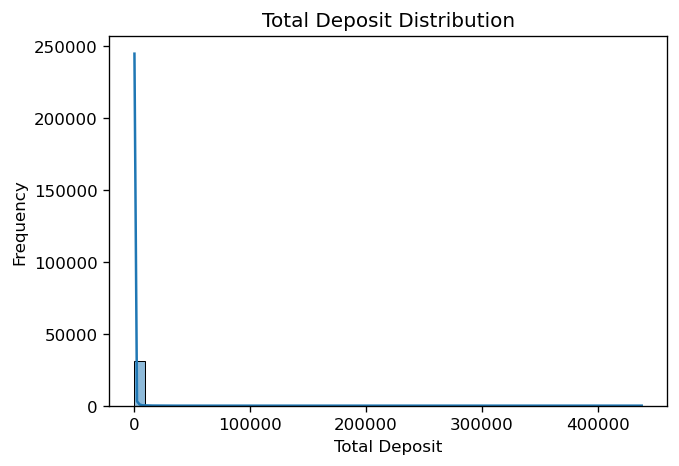

In [13]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'total_deposit',data=df_clean,bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Total Deposit')
plt.title('Total Deposit Distribution')
plt.show()

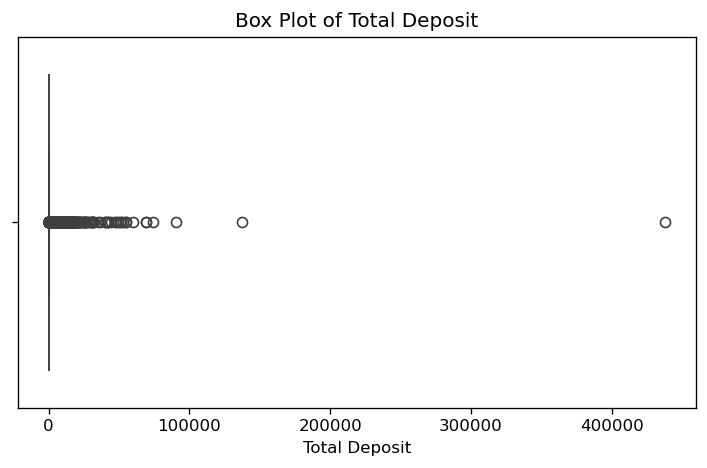

In [14]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.boxplot(x = 'total_deposit',data=df_clean)
plt.title('Box Plot of Total Deposit')
plt.xlabel('Total Deposit')
plt.tight_layout()
plt.show()

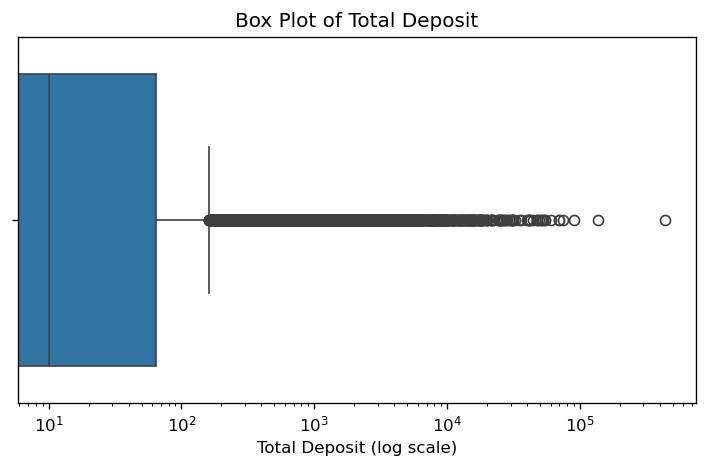

In [15]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.boxplot(x = 'total_deposit',data=df_clean)
plt.title('Box Plot of Total Deposit')
plt.xscale('log')
plt.xlabel('Total Deposit (log scale)')
plt.tight_layout()
plt.show()

There are huge outliers in the data. I'm going to plot the bottom 75% to have a better idea

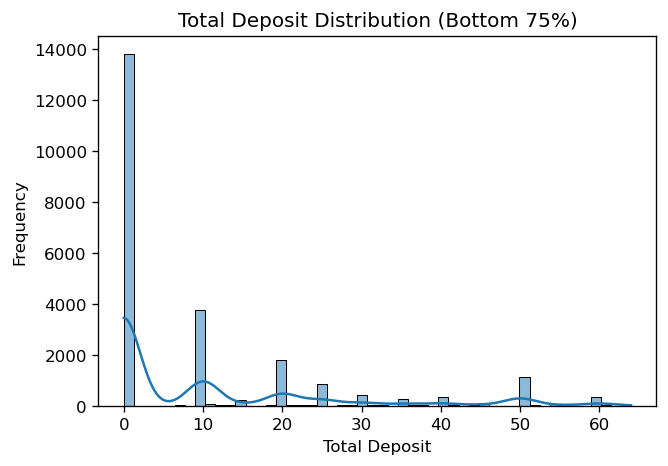

In [16]:
perc_75 = df_clean['total_deposit'].describe()['75%']
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'total_deposit',data=df_clean[df_clean['total_deposit'] <= perc_75],bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Total Deposit')
plt.title('Total Deposit Distribution (Bottom 75%)')
plt.show()

In [17]:
df_clean[df_clean['total_deposit'] == 0]

,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr
1,2023-11-01,154497623,AZ,2022-10-28,2022-10-28,2022-10-28,actionnetwork,7039239,BETTING,0.00,5.00,4.00
5,2023-11-01,153923970,PA,2022-09-12,2022-09-12,2022-09-12,BCUSA22N,7086406,CASINO,0.00,0.00,0.00
7,2023-11-01,153776081,AZ,2022-09-10,2022-09-10,2022-09-15,starsportsmx,7080479,BETTING,0.00,170.00,136.00
8,2023-11-01,160312091,OH,2022-12-03,2023-05-20,2023-01-08,actionnetwork,7083318,BETTING,0.00,1188.58,261.74
12,2023-11-01,159636179,MI,2023-05-27,2023-05-27,2023-05-27,starsportsmx,7077220,CASINO,0.00,0.00,-7.20
...,...,...,...,...,...,...,...,...,...,...,...,...
52494,2024-03-01,167313026,IS,2022-04-04,2023-07-29,2023-07-29,actionnetwork,7074015,BETTING,0.00,0.00,0.00
52496,2024-03-01,166304781,AZ,2023-03-16,2023-03-16,2023-03-20,actionnetwork,7098737,BETTING,0.00,19.00,7.72
52497,2024-03-01,186652738,MI,2024-01-05,2024-01-05,2024-01-05,BCUSA22N,7086399,CASINO,0.00,0.00,0.00
52498,2024-03-01,188161661,IS,2024-01-28,2024-01-28,2024-01-28,BCUSA22NP,7096195,BETTING,0.00,0.00,0.00


I need to make more assumptions. In this case, there are entries with 0 total deposit but some have handle/ngr. I'll assume the deposits were made in previous months, and that total_deposit doesn't show an account balance but rather how much money was deposited in that activity month

#### b. Total Handle

In [18]:
df_clean['total_handle'].describe()

count     31259.00
mean       1835.25
std       31756.29
min           0.00
25%          10.00
50%          85.45
75%         323.00
max     4769780.00
Name: total_handle, dtype: float64

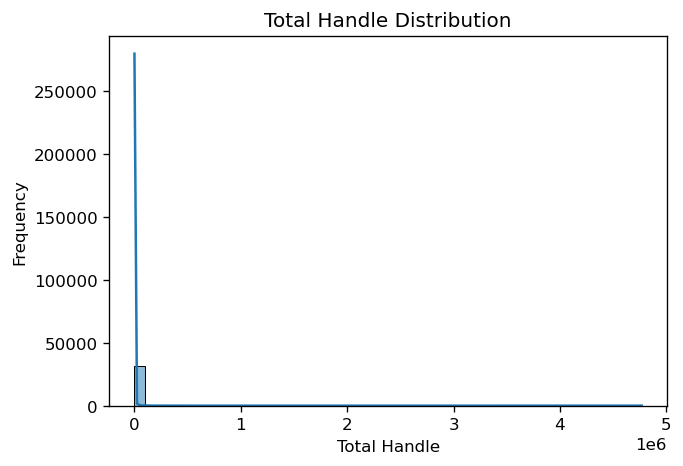

In [19]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'total_handle',data=df_clean,bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Total Handle')
plt.title('Total Handle Distribution')
plt.show()

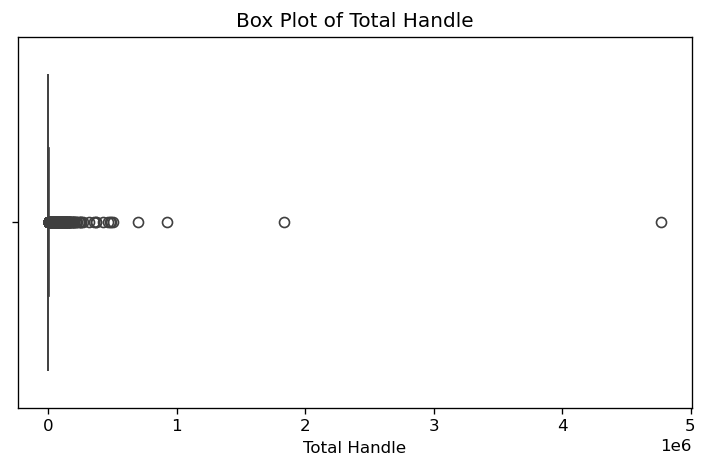

In [20]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.boxplot(x = 'total_handle',data=df_clean)
plt.title('Box Plot of Total Handle')
plt.xlabel('Total Handle')
plt.tight_layout()
plt.show()

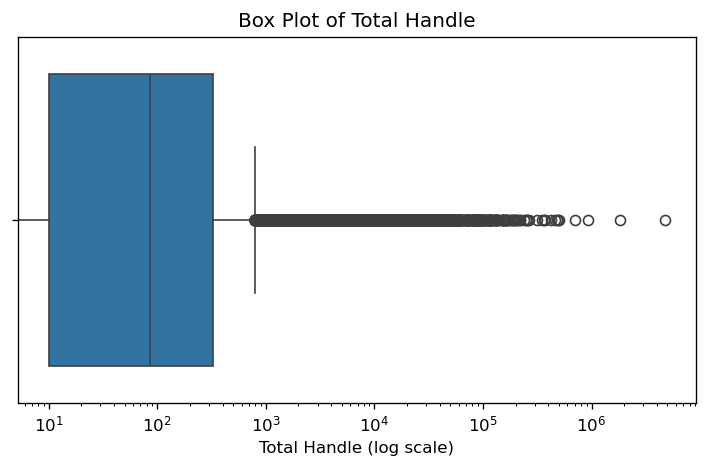

In [21]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.boxplot(x = 'total_handle',data=df_clean)
plt.title('Box Plot of Total Handle')
plt.xscale('log')
plt.xlabel('Total Handle (log scale)')
plt.tight_layout()
plt.show()

Similar situation as Total Deposit. And it makes sense, few players spend a lot

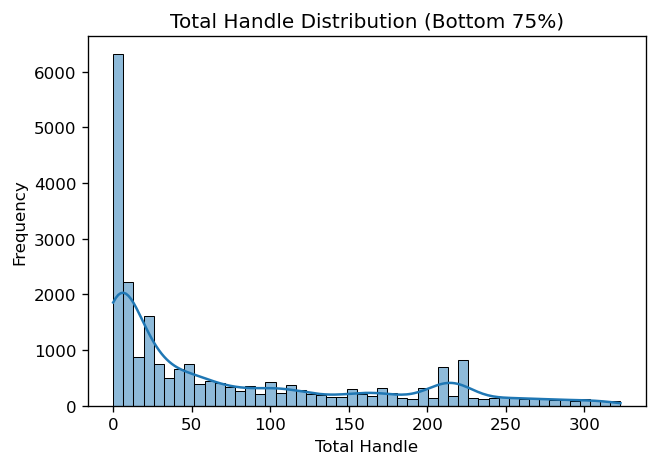

In [22]:
perc_75 = df_clean['total_handle'].describe()['75%']
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'total_handle',data=df_clean[df_clean['total_handle'] <= perc_75],bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Total Handle')
plt.title('Total Handle Distribution (Bottom 75%)')
plt.show()

#### c. Total NGR

In [23]:
df_clean['total_ngr'].describe()

count    31259.00
mean        52.59
std        867.01
min     -36411.00
25%         -0.22
50%          7.93
75%         54.81
max      56051.20
Name: total_ngr, dtype: float64

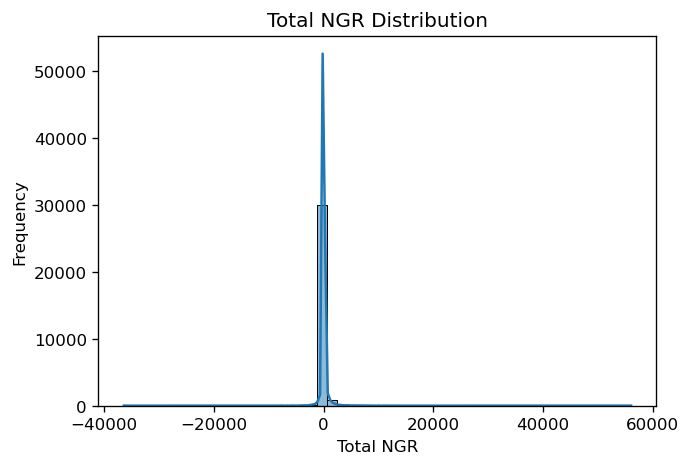

In [24]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'total_ngr',data=df_clean,bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Total NGR')
plt.title('Total NGR Distribution')
plt.show()

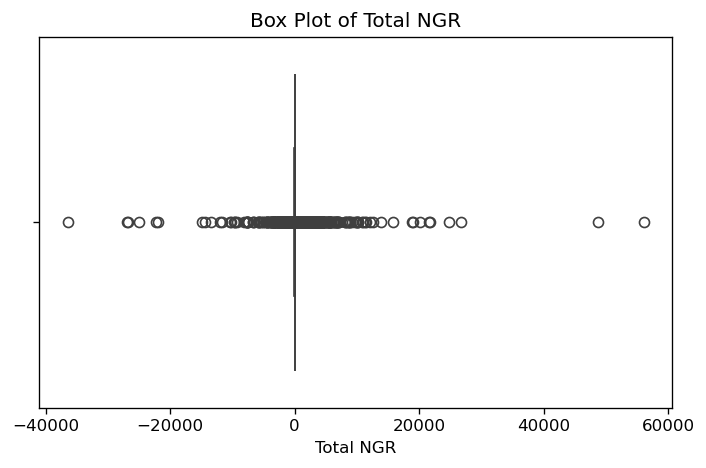

In [25]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.boxplot(x = 'total_ngr',data=df_clean)
plt.title('Box Plot of Total NGR')
plt.xlabel('Total NGR')
plt.tight_layout()
plt.show()

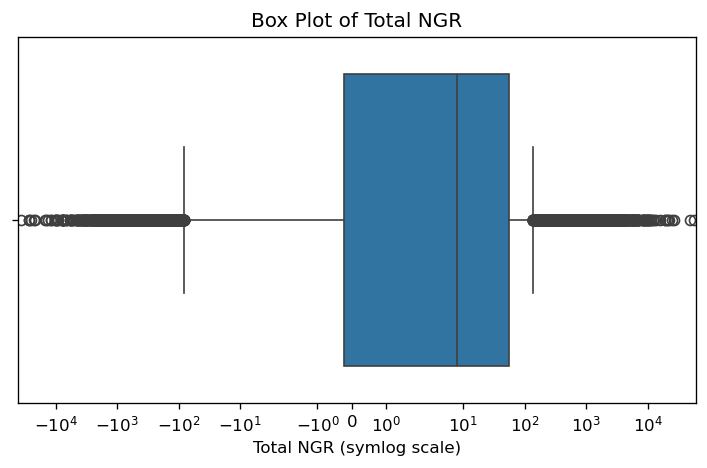

In [26]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.boxplot(x = 'total_ngr',data=df_clean)
plt.title('Box Plot of Total NGR')
plt.xscale('symlog')
plt.xlabel('Total NGR (symlog scale)')
plt.tight_layout()
plt.show()

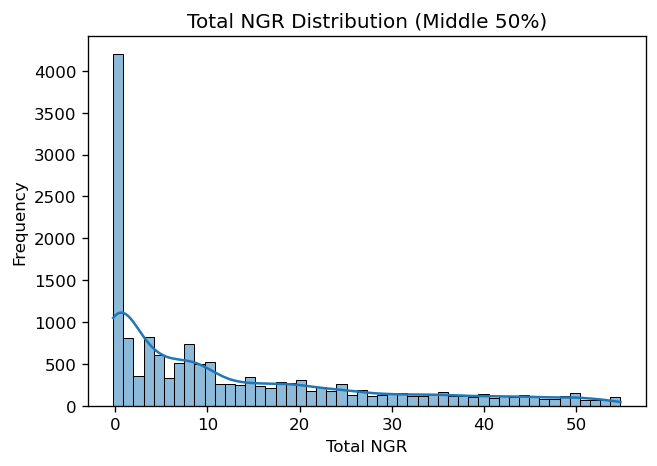

In [27]:
perc_25 = df_clean['total_ngr'].describe()['25%']
perc_75 = df_clean['total_ngr'].describe()['75%']
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'total_ngr',
            data=df_clean[(df_clean['total_ngr'] >= perc_25) & (df_clean['total_ngr'] <= perc_75)],
            bins=50,
            kde=True)
plt.ylabel('Frequency')
plt.xlabel('Total NGR')
plt.title('Total NGR Distribution (Middle 50%)')
plt.show()

At least we make more than what we lose

### 6. Other Analyses
#### a. Active months per account

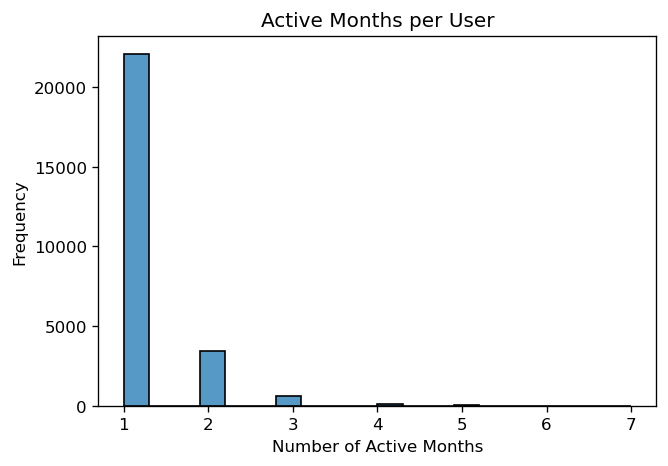

In [28]:
activity_span = df_clean.groupby('account_id')['activity_month'].nunique()
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(activity_span, bins=20)
plt.title('Active Months per User')
plt.xlabel('Number of Active Months')
plt.ylabel('Frequency')
plt.show()


#### b. How many registered users move up through each stage? (on original dataset)

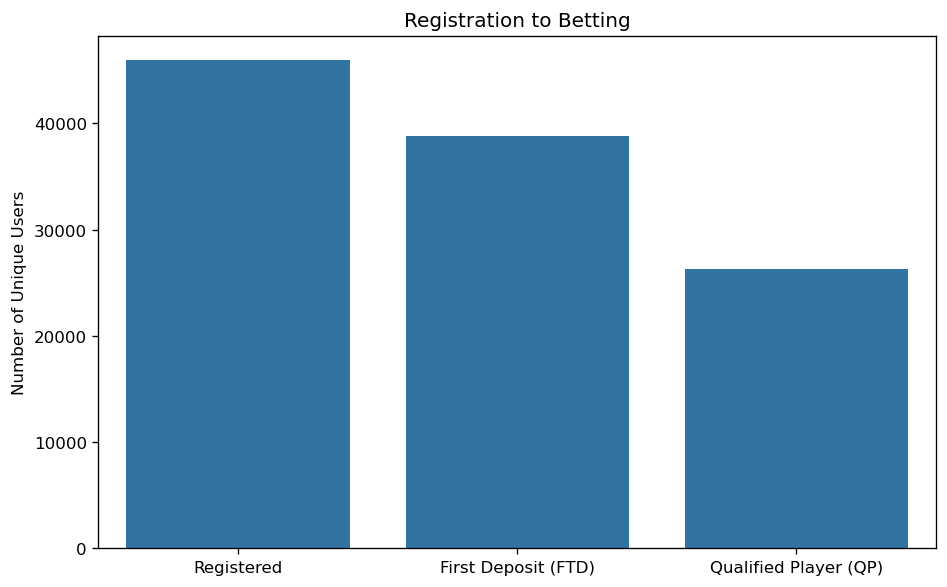

In [29]:
registered = df['account_id'].nunique()
ftd = df[df['ftd_date'].notnull()]['account_id'].nunique()
qp = df[df['qp_date'].notnull()]['account_id'].nunique()

user_count = [registered, ftd, qp]
labels = ['Registered', 'First Deposit (FTD)', 'Qualified Player (QP)']

plt.figure(figsize=(8, 5), dpi=120)
subplot = sns.barplot(x=labels, y=user_count)
plt.title('Registration to Betting')
plt.ylabel('Number of Unique Users')
plt.tight_layout()
plt.show()


### 7. Saving dataset for modeling

Using the hint, let's create the months_active columnd we're gonna need in the models

In [30]:
df_clean['months_active'] = ((df_clean['activity_month'].dt.year - df_clean['ftd_date'].dt.year) * 12
                            + (df_clean['activity_month'].dt.month - df_clean['ftd_date'].dt.month))
df_clean['months_active'].describe()

/var/folders/v6/dl32jb354v959xd669hxxn140000gn/T/ipykernel_91365/1806511828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['months_active'] = ((df_clean['activity_month'].dt.year - df_clean['ftd_date'].dt.year) * 12


count   31259.00
mean        4.76
std         5.49
min       -12.00
25%         0.00
50%         3.00
75%         8.00
max        35.00
Name: months_active, dtype: float64

In [31]:
df_clean[df_clean['months_active'] < 0]

,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr,months_active
93,2023-01-01,157024508,MD,2023-01-17,2023-03-17,2023-03-18,starsportsmx,7077214,BETTING,0.00,0.00,0.00,-2
124,2023-01-01,157117833,TN,2023-01-21,2023-02-25,2023-02-25,BCUSA22N,7086400,BETTING,0.00,0.00,0.00,-1
174,2023-06-01,156600214,IS,2023-07-01,2023-07-01,2023-02-12,actionnetwork,7083318,BETTING,0.00,55.00,-42.56,-1
175,2023-06-01,158390637,MA,2023-08-03,2023-08-03,2023-03-10,BCUSA22N,7089727,BETTING,0.00,2.00,-1.76,-2
182,2023-06-01,159419928,NE,2023-09-05,2023-09-05,2023-05-09,starsportsmx,7101919,CASINO,0.00,0.00,10.40,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,2023-10-01,181968714,PA,2023-10-27,2023-11-18,2023-11-18,starsportsmx,7077219,BETTING,0.00,0.00,0.00,-1
48915,2023-10-01,182560320,MI,2023-10-30,2023-11-01,2023-11-01,starsportsmx,7086118,CASINO,0.00,0.00,0.00,-1
49372,2023-10-01,182725930,WV,2023-10-31,2023-11-11,2023-11-11,BCUSA22N,7103518,CASINO,0.00,0.00,0.00,-1
49570,2023-10-01,180505313,KY,2023-10-20,2023-11-05,2023-11-05,BCUSA22N,7086399,BETTING,0.00,0.00,0.00,-1


So again, we found inconsistencies in the data. In this case, there are 1,268 rows (~2.4%) where activity_month < ftd_date, resulting in negative months_active. These means there are activities that happened before players making their first deposit, which is probably due to a business logic I'm unaware of, such as bonuses, freebies, credits, etc.

I'm also going to exclude this data in order to avoid assumptions.

In [32]:
df_clean = df_clean[df_clean['months_active'] >= 0]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 1 to 52499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity_month      29991 non-null  datetime64[ns]
 1   account_id          29991 non-null  object        
 2   brand_id            29991 non-null  object        
 3   reg_date            29991 non-null  datetime64[ns]
 4   ftd_date            29991 non-null  datetime64[ns]
 5   qp_date             29991 non-null  datetime64[ns]
 6   ben_login_id        29991 non-null  object        
 7   tracker_id          29991 non-null  object        
 8   player_reg_product  29991 non-null  object        
 9   total_deposit       29991 non-null  float64       
 10  total_handle        29991 non-null  float64       
 11  total_ngr           29991 non-null  float64       
 12  months_active       29991 non-null  int32         
dtypes: datetime64[ns](4), float64(3), int32(1), object(

We'll keep this dataset for modeling

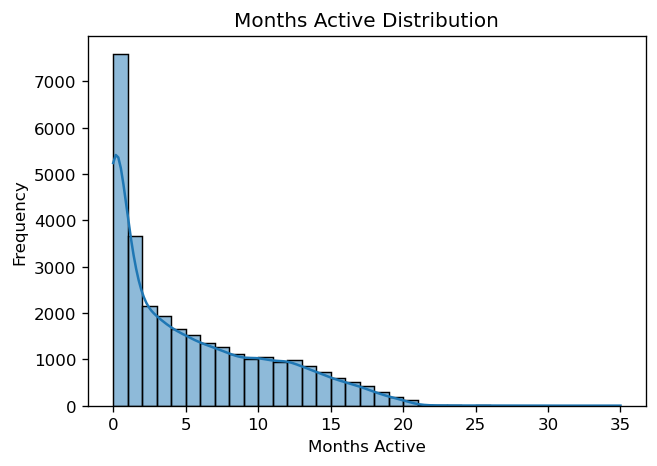

In [33]:
plt.figure(figsize=(6, 4), dpi=120)
splot = sns.histplot(x = 'months_active',data=df_clean,bins=35,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Months Active')
plt.title('Months Active Distribution')
plt.show()

In [34]:
df_clean.to_csv('../data/clean_data.csv', index=False)

Now let's go modeling :)